In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.losses import BinaryCrossentropy
logLoss = BinaryCrossentropy ()

relu = ReLU ()

In [2]:
X, y = make_moons (100, noise=0.25, random_state=2)

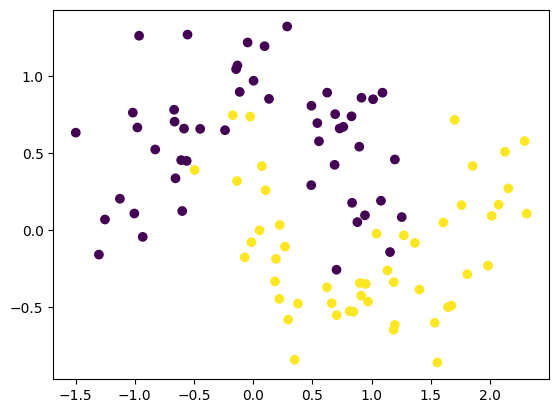

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show ()

In [4]:
firstModel = Sequential()
firstModel.add (Dense (128, input_dim=2, activation=relu))
firstModel.add (Dense (128, activation=relu))
firstModel.add (Dense (1, activation='sigmoid'))

firstModel.summary ()

c:\Users\admin\Documents\CSL701_2526\deepLearning\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)               │        384 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 128)               │     16,512 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │        129 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)

firstModel.compile (loss=logLoss, optimizer=adam, metrics=['accuracy'])

In [7]:
firstHistory = firstModel.fit (X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 953us/step


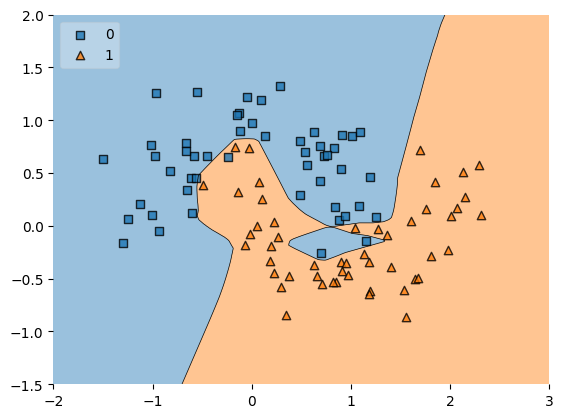

In [8]:
plot_decision_regions (X, y.astype('int'), clf=firstModel, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

In [9]:
firstHistory.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

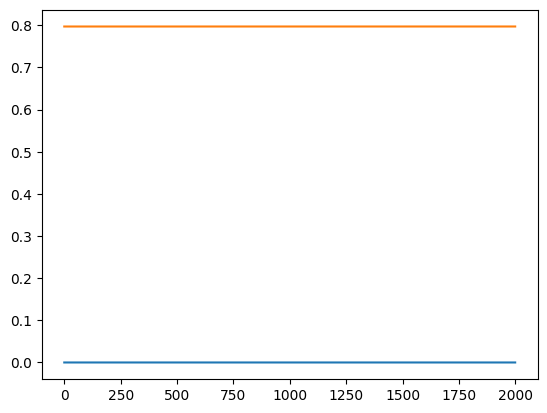

In [10]:
plt.plot(firstHistory.history['loss'])
plt.plot(firstHistory.history['val_loss'])

In [11]:
from tensorflow.keras.regularizers import l2

In [15]:
secondModel = Sequential()
secondModel.add (Dense (128, input_dim=2, activation=relu, kernel_regularizer=l2(0.03)))
secondModel.add (Dense (128, activation=relu, kernel_regularizer=l2(0.03)))
secondModel.add (Dense (1, activation='sigmoid'))

secondModel.summary ()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)               │        384 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 128)               │     16,512 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_8 (Dense)                 │ (None, 1)                 │        129 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
adam = Adam(learning_rate=0.01)

In [17]:
secondModel.compile (loss=logLoss, optimizer=adam, metrics=['accuracy'])

In [18]:
secondHistory = secondModel.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 943us/step


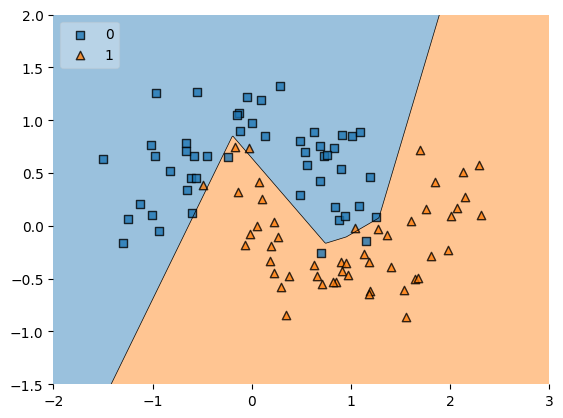

In [19]:
plot_decision_regions (X, y.astype('int'), clf=secondModel, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

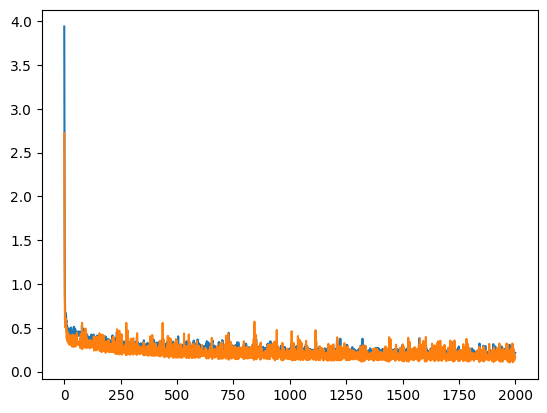

In [20]:
plt.plot(secondHistory.history['loss'])
plt.plot(secondHistory.history['val_loss'])